In [3]:
from utils import *
import matplotlib.pyplot as plt


/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [35]:
points_msg=rospy.wait_for_message("/hsrb/head_rgbd_sensor/depth_registered/rectified_points",PointCloud2,timeout=5)

In [36]:
points_data = ros_numpy.numpify(points_msg)    
image_data = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]   
image=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
image = points_data['rgb'].view((np.uint8, 4))[..., [2, 1, 0]]
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB) 

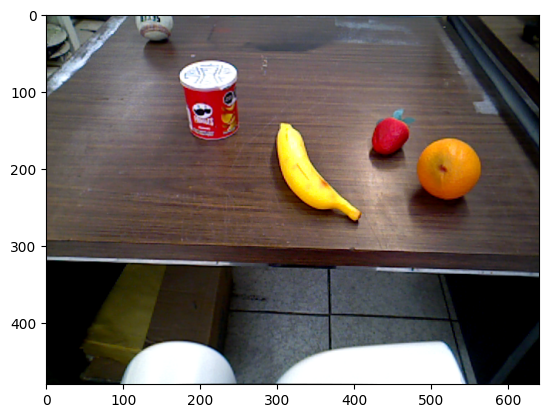

In [37]:
plt.imshow(rgb_image)

In [38]:
try:
        trans = tfBuffer.lookup_transform('map', 'head_rgbd_sensor_link', rospy.Time())
                    
        trans,rot=read_tf(trans)
        #print ("############head",trans,rot)
except (tf2_ros.LookupException, tf2_ros.ConnectivityException, tf2_ros.ExtrapolationException):
        print ( 'No head TF FOUND')
t= write_tf(trans,rot)
cloud_out = do_transform_cloud(points_msg, t)

In [39]:
np_corrected=ros_numpy.numpify(cloud_out)
corrected=np_corrected.reshape(points_data.shape)

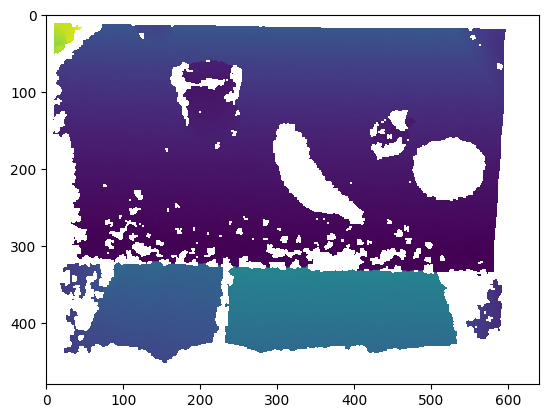

In [40]:
plt.imshow(points_data['z'])

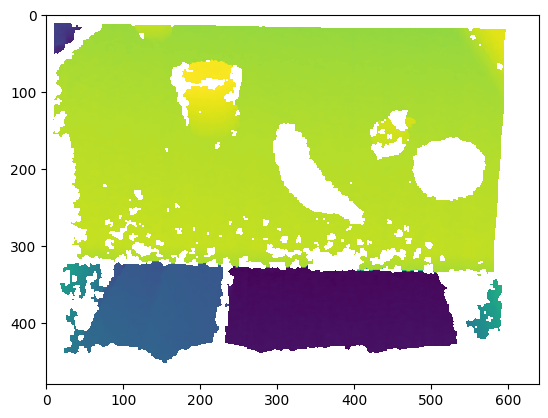

In [41]:
plt.imshow(corrected['z'])

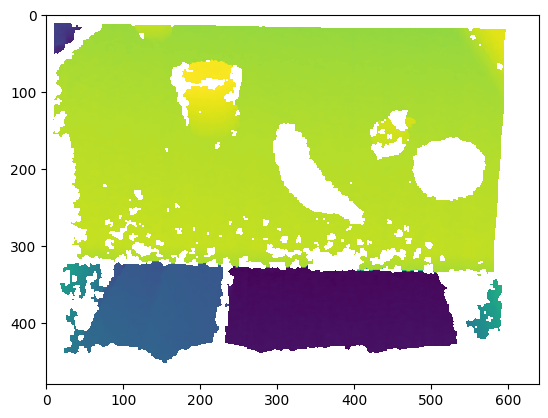

In [42]:
img_z=corrected['z']
plt.imshow(img_z)

Number of planes found 7 at z=[[[-0.05420218  0.5992058   0.60717416  0.6151425   0.62311095  0.6310793
   0.6390477 ]]]#############3
Plane heights detected [-0.05420218  0.5992058   0.60717416  0.6151425   0.62311095  0.6310793
  0.6390477 ] maximum  z=[0.6390476822853088]#############3


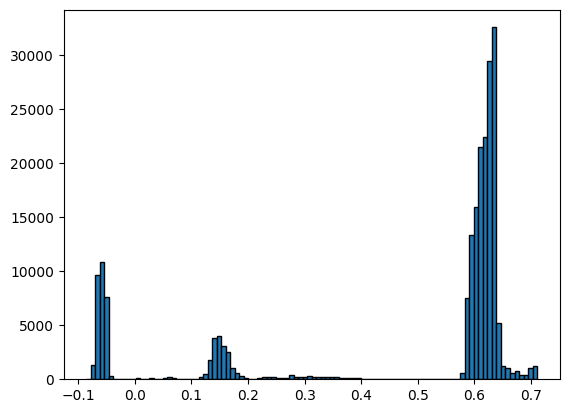

In [43]:
zs_no_nans=corrected['z'][~np.isnan(corrected['z'])]
counts, bins =(np.histogram(zs_no_nans, bins=100))
inds=np.where(counts>10000)
planes_heights=bins[np.add(inds, 1)].flatten()
print (f'Number of planes found {len(inds[0])} at z=[{bins[ np.add(inds, 1)]}]#############3')
print (f'Plane heights detected {planes_heights} maximum  z=[{planes_heights.max()}]#############3')

fig, ax = plt.subplots()
ax.bar(bins[:-1], counts, width=np.diff(bins), edgecolor="black", align="edge")

plt.show()

In [44]:
plane_height=planes_heights.max()
print(f'plane height{plane_height}')
low_plane = (corrected['z'] > (plane_height-0.02)) #plane height
high_plane = (corrected['z'] < (plane_height+0.02))#plane height + obj height
z_lims=np.logical_and(low_plane, high_plane)
 

plane height0.6390476822853088


In [45]:
result_indices = np.where(z_lims)#np.logical_and(z_lims, x_lims))
x=np.asarray((corrected['x'][result_indices].min()*0.9,corrected['x'][result_indices].max()*1.1)).reshape(-1, 1)
y=np.asarray((corrected['y'][result_indices].min()*0.9,corrected['y'][result_indices].max()*1.1)).reshape(-1, 1)

region=np.append(x,y,axis=1)
print(f'region{region}')


rospack = rospkg.RosPack()        
file_path = rospack.get_path('config_files') 
#np.save(file_path+'/regions/shelves_region.npy',region)
np.save(file_path+'/regions/pickup_region.npy',region)

region[[ 0.27181498 -1.08482791]
 [ 1.16927793 -0.69595292]]


In [46]:
region

array([[ 0.27181498, -1.08482791],
       [ 1.16927793, -0.69595292]])

Error:   TF_NAN_INPUT: Ignoring transform for child_frame_id "tomato_soup_can" from authority "/smach" because of a nan value in the transform (-nan -nan -nan) (0.000000 0.000000 0.000000 1.000000)
         at line 240 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
Error:   TF_NAN_INPUT: Ignoring transform for child_frame_id "tomato_soup_can" from authority "/smach" because of a nan value in the transform (-nan -nan -nan) (0.000000 0.000000 0.000000 1.000000)
         at line 240 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
Error:   TF_NAN_INPUT: Ignoring transform for child_frame_id "pudding_box" from authority "/smach" because of a nan value in the transform (-nan -nan -nan) (0.000000 0.000000 0.000000 1.000000)
         at line 240 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
Error:   TF_NAN_INPUT: Ignoring transform for child_frame_id "pudding_box" from authority "/smach" because of a nan value in the transform (-nan -nan -nan) (0.000000 0.00